In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [2]:
data= pd.read_csv('Train_Dataset.csv')
data.head()

,headline,is_sarcastic
0,supreme court votes 7-2 to legalize all worldl...,1
1,hungover man horrified to learn he made dozens...,1
2,emily's list founder: women are the 'problem s...,0
3,send your kids back to school with confidence,0
4,watch: experts talk pesticides and health,0


In [3]:
data.shape

(44262, 2)

In [4]:
data.isnull().sum()

headline        0
is_sarcastic    0
dtype: int64

In [5]:
port_stem = PorterStemmer()
clean_headline = []
for i in range(0,len(data)):
    stemmed_content = re.sub('[^a-zA-Z]',' ', data['headline'][i])
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    clean_headline.append(stemmed_content)

In [6]:
clean_headline[0]

'suprem court vote legal worldli vice'

In [7]:
data['clean_headline'] = pd.DataFrame(clean_headline)

In [8]:
data.head()

,headline,is_sarcastic,clean_headline
0,supreme court votes 7-2 to legalize all worldl...,1,suprem court vote legal worldli vice
1,hungover man horrified to learn he made dozens...,1,hungov man horrifi learn made dozen plan last ...
2,emily's list founder: women are the 'problem s...,0,emili list founder women problem solver congress
3,send your kids back to school with confidence,0,send kid back school confid
4,watch: experts talk pesticides and health,0,watch expert talk pesticid health


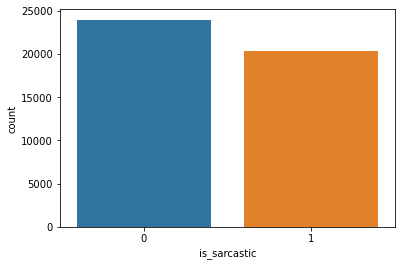

In [9]:
ax = sns.countplot(x='is_sarcastic', data=data)

In [10]:
sacarstic_data = data[data['is_sarcastic'] == 1]['clean_headline']
not_sacarstic_data = data[data['is_sarcastic'] == 0]['clean_headline']

In [11]:
sacarstic_data

0                     suprem court vote legal worldli vice
1        hungov man horrifi learn made dozen plan last ...
6                           u digniti reserv nearli deplet
8        report still time convert christian christma s...
10               kid honor grandpa memori solemn cannonbal
                               ...                        
44251      men women arm forc thank local woman song dedic
44252          pope franci concern infect holi spirit bite
44253    cowork retreat remot corner offic complet disg...
44256                         gay right leader lookin good
44261          area loser bliss unaffect whim stock market
Name: clean_headline, Length: 20304, dtype: object

In [12]:
not_sacarstic_data

2         emili list founder women problem solver congress
3                              send kid back school confid
4                        watch expert talk pesticid health
5        jame corden red hot chili pepper strip carpool...
7                               ignit spark bodi mind soul
                               ...                        
44255                           prison escape appear court
44257                greec seek reassur europ tension rise
44258        vatican say transgend man cannot becom godpar
44259    protest eject donald trump ralli hold pocket c...
44260                             italian recip oldi goodi
Name: clean_headline, Length: 23958, dtype: object

In [13]:
sacarstic_words = [words for i in sacarstic_data for words in i.split()]
non_sacarstic_words = [words for i in not_sacarstic_data for words in i.split()]

In [14]:
from collections import Counter 

In [15]:
def get_words(input_data, num=40):
    word_toks = Counter(input_data)
    most_common_words = word_toks.most_common(num)
    result = dict(most_common_words)
    return result 

In [16]:
most_common_sarcastic_words =  get_words(sacarstic_words)
print(most_common_sarcastic_words)

{'man': 1944, 'new': 1435, 'report': 910, 'area': 782, 'year': 699, 'nation': 685, 'get': 676, 'woman': 548, 'time': 521, 'day': 505, 'american': 498, 'one': 497, 'trump': 495, 'old': 450, 'make': 439, 'find': 435, 'like': 420, 'go': 414, 'still': 367, 'studi': 363, 'u': 362, 'back': 355, 'first': 342, 'famili': 336, 'hous': 329, 'take': 326, 'friend': 325, 'say': 321, 'look': 319, 'work': 316, 'obama': 303, 'life': 297, 'peopl': 278, 'white': 273, 'last': 270, 'use': 265, 'come': 263, 'guy': 262, 'announc': 261, 'would': 254}


In [17]:
most_common_non_sarcastic_words =  get_words(non_sacarstic_words)
print(most_common_non_sarcastic_words)

{'trump': 2302, 'new': 1076, 'say': 841, 'donald': 726, 'get': 602, 'make': 600, 'year': 585, 'women': 504, 'one': 442, 'day': 434, 'u': 419, 'show': 415, 'way': 411, 'like': 403, 'man': 400, 'peopl': 388, 'obama': 385, 'world': 377, 'first': 376, 'take': 376, 'thing': 371, 'time': 367, 'want': 364, 'call': 362, 'american': 362, 'need': 353, 'gop': 339, 'watch': 338, 'love': 332, 'clinton': 332, 'black': 330, 'life': 329, 'state': 328, 'live': 323, 'white': 314, 'hous': 309, 'chang': 307, 'could': 297, 'star': 296, 'kid': 292}


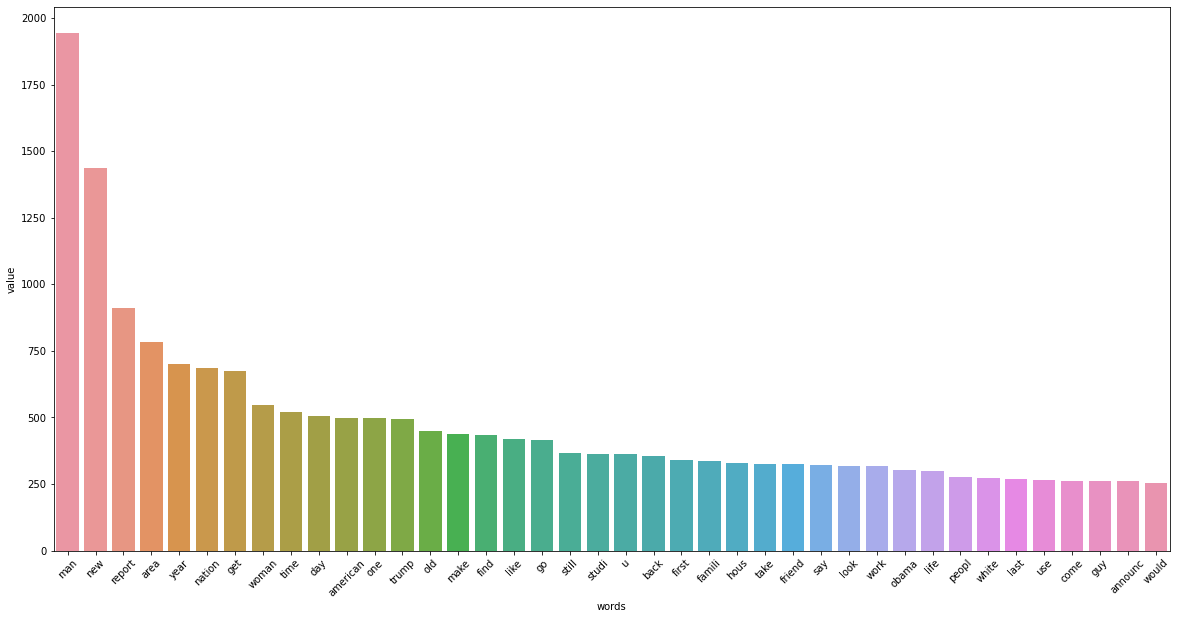

In [18]:
df_1 = pd.DataFrame(most_common_sarcastic_words.items(), columns =['words', 'value'])
plt.figure(figsize =(20,10))
sns.barplot(x='words', y='value', data=df_1)
plt.xticks(rotation=45)
plt.show()

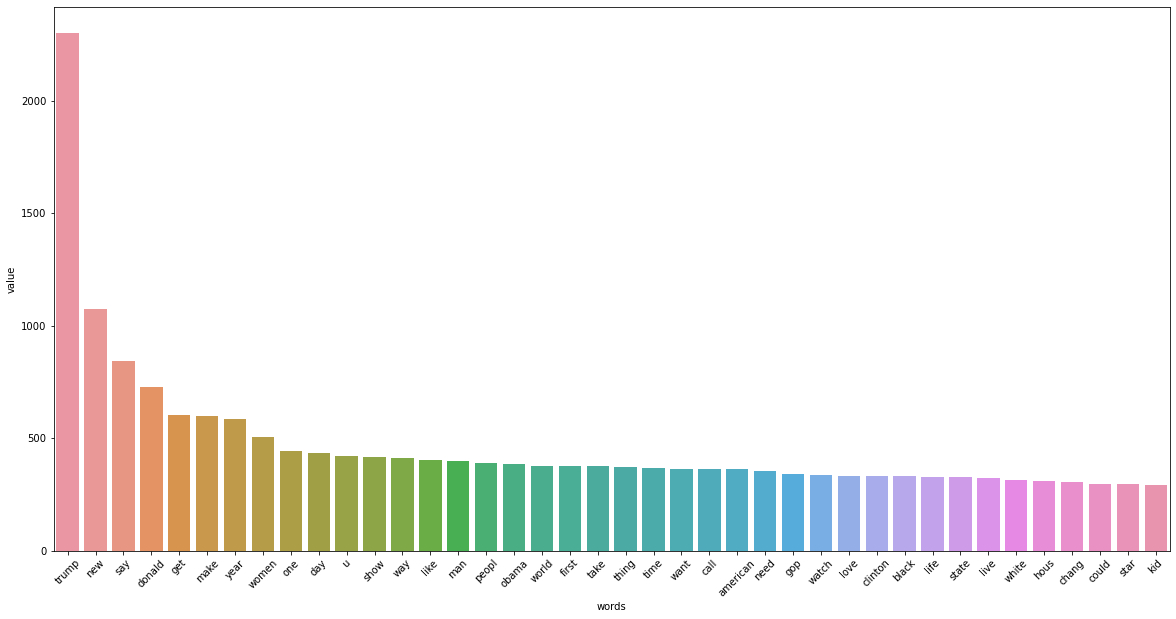

In [19]:
df_2 = pd.DataFrame(most_common_non_sarcastic_words.items(), columns =['words', 'value'])
plt.figure(figsize =(20,10))
sns.barplot(x='words', y='value', data=df_2)
plt.xticks(rotation=45)
plt.show()

In [20]:
#VECTORIZING THE EACH WORDS BY CREATING THE Tf-Idf model
#from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
#X = tfidf_v.fit_transform(clean_headline).toarray()


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(clean_headline).toarray()

In [22]:
X.shape

(44262, 5000)

In [23]:
#count_df = pd.DataFrame(X , columns=tfidf_v.get_feature_names())
#count_df.head()

In [24]:
y = data['is_sarcastic']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, random_state=101, solver='liblinear')

In [40]:
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
score = metrics.accuracy_score(y_test, pred)

In [41]:
score

0.8306788659211567

In [42]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, pred)
cm

array([[4206,  657],
       [ 842, 3148]])

In [45]:
test_data = pd.read_csv('Test_Dataset.csv')

In [46]:
test_data.head(10)

,headline
0,area stand-up comedian questions the deal with...
1,dozens of glowing exit signs mercilessly taunt...
2,perfect response to heckler somewhere in prop ...
3,gop prays for ossoff lossoff
4,trevor noah says the scary truth about trump's...
5,israeli pm debuts new road map for continued s...
6,"after careful thought, teen applies to college..."
7,historical archives: last month's weather
8,the importance of trying
9,michigan state took too long with sexual assau...


In [47]:
test_data.shape

(11066, 1)

In [58]:
port_stem = PorterStemmer()
test_list = []
for i in range(0,len(test_data)):
    content = re.sub('[^a-zA-Z]',' ', test_data['headline'][i])
    content = content.lower()
    content = content.split()
    content = [port_stem.stem(word) for word in content if not word in stopwords.words('english')]
    content = ' '.join(content)
    test_list.append(content)

In [59]:
tfidf=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
test_vec = tfidf.fit_transform(test_list).toarray()

In [60]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
test_vec = cv.fit_transform(test_list).toarray()

In [63]:
pred_1 = lr.predict(test_vec)
len(pred_1)

11066

In [64]:
pred_1

array([1, 0, 1, ..., 1, 1, 0])

In [65]:
res = pd.DataFrame(pred_1) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False)      # the csv file will be saved locally on the same location where this 